In [1]:
import pandas as pd

In [2]:
train=pd.read_csv(r"C:\Users\visha\OneDrive\Desktop\pytorch\twitter_training.csv")
test=pd.read_csv(r"C:\Users\visha\OneDrive\Desktop\pytorch\twitter_validation.csv")

In [3]:
train

,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


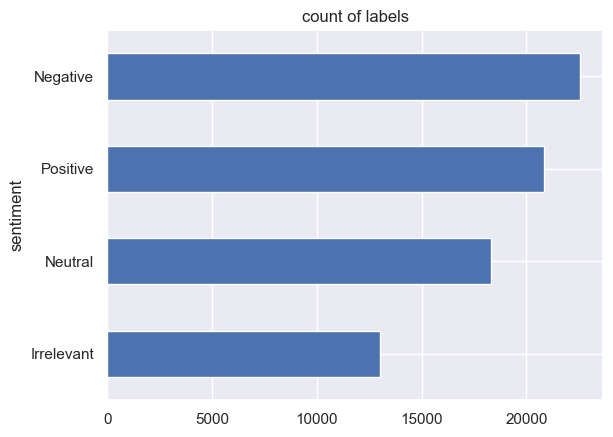

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
train['sentiment'].value_counts(ascending=True).plot.barh()
plt.title("count of labels")
plt.show()

In [5]:
train

,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
test

,tweet_id,entity,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
import transformers
from transformers import AutoTokenizer
checkpoint="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)
def tokenize_function(batch):
    return tokenizer(batch["tweet"],padding=True,truncation=True)

In [ ]:
tokenized_data=train.map(tokenize_function,batched=True,batch_size=None)

In [1]:
%pip install textblob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer,PatternAnalyzer

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/626.3 kB 787.7 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/626.3 kB 939.4 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 853.3 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 958.4 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/626.3 kB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  624.6

In [3]:
!pip install VaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ------------------------------ 30.7/126.0 kB 1.4 MB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 495.5 kB/s eta 0:00:01
   ----------------------------------- ---- 112.6/126.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [4]:
# %pip install vaderSentiment ## install the library if you don't have
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [9]:
!pip install flair

  Using cached flair-0.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached boto3-1.34.136-py3-none-any.whl.metadata (6.6 kB)
  Using cached bpemb-0.3.5-py3-none-any.whl.metadata (19 kB)
  Using cached conllu-4.5.3-py2.py3-none-any.whl.metadata (19 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ftfy-6.2.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Janome-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached lxml-5.2.2-cp312-cp312-win_amd64.whl.metadata

  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [714 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
      creating build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> bui

In [22]:
pip install torchmoji


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torchmoji (from versions: none)
ERROR: No matching distribution found for torchmoji


In [21]:
import flair.models
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')
# Import flair Sentence to process input text
from flair.data import Sentence
# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

text=" Very Good Service offered by Team."
sentence = Sentence(text)
classifier.predict(sentence)
score = sentence.labels[0].score
value = sentence.labels[0].value

ModuleNotFoundError: No module named 'flair'